<a href="https://colab.research.google.com/github/imtufail/Machine-Learning-Contents/blob/main/Feature%20Scaling%20/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
custdf = pd.read_csv('Customer.xls')
snwdf = pd.read_csv('Social_Network_Ads.xls')
trndf=pd.read_csv('train.xls')
evsdf= pd.read_csv('EVSE-B-PowerCombined.csv')

In [90]:
custdf.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [71]:
snwdf .head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
trndf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
evsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           115298 non-null  object 
 1   shunt_voltage  115298 non-null  int64  
 2   bus_voltage_V  115298 non-null  float64
 3   current_mA     115298 non-null  int64  
 4   power_mW       115298 non-null  int64  
 5   State          115298 non-null  object 
 6   Attack         115298 non-null  object 
 7   Attack-Group   115298 non-null  object 
 8   Label          115298 non-null  object 
 9   interface      115298 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.8+ MB


In [92]:
# no need of it
# Convert 'Label' column to numeric: attack=1, beigin=0
#evsdf['Label'] = evsdf['Label'].map({'attack': 1, 'benign': 0})

In [93]:
evsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           115298 non-null  object 
 1   shunt_voltage  115298 non-null  int64  
 2   bus_voltage_V  115298 non-null  float64
 3   current_mA     115298 non-null  int64  
 4   power_mW       115298 non-null  int64  
 5   State          115298 non-null  object 
 6   Attack         115298 non-null  object 
 7   Attack-Group   115298 non-null  object 
 8   Label          115298 non-null  int64  
 9   interface      115298 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 8.8+ MB


In [106]:
evsdf.sample(10)

,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface,year,month,day,hour
113185,501,5.201,478,2500,idle,Backdoor,host-attack,1,any,2023,12,30,11
14252,534,5.197,485,2560,idle,tcp-flood,DoS,1,ocpp,2023,12,25,13
30118,496,5.197,510,2620,idle,tcp-flood,DoS,1,ocpp,2023,12,25,17
92713,467,5.201,471,2460,idle,vuln-scan,recon,1,ocpp,2023,12,25,1
82734,477,5.197,475,2620,idle,vuln-scan,recon,1,ocpp,2023,12,24,22
71008,615,5.193,652,3380,idle,vuln-scan,recon,1,ocpp,2023,12,24,19
74166,464,5.201,465,2560,idle,vuln-scan,recon,1,ocpp,2023,12,24,20
114417,478,5.201,475,2500,idle,Backdoor,host-attack,1,any,2023,12,30,11
62911,484,5.201,463,2420,idle,syn-stealth,recon,1,ocpp,2023,12,24,16
47188,957,5.165,906,4580,charging,cryptojacking,host-attack,1,any,2023,12,26,18


# Train Test Split.
## it is recommended to do train test split before
either you have to do Standardaisation or Normalisation

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(evsdf.drop(['Label'],axis =1),
                                               evsdf['Label'],
                                               test_size=0.3,
                                               random_state=0)
x_train.shape, x_test.shape

((80708, 9), (34590, 9))

In [5]:
y_test.head()

,Label
99716,attack
30456,attack
69799,attack
39890,benign
39134,benign


In [6]:
# x_train = x_train.drop(columns=['time'], errors='ignore')
# x_test = x_test.drop(columns=['time'], errors='ignore')
evsdf['time'] = pd.to_datetime(evsdf['time'], errors='coerce')
evsdf['year'] = evsdf['time'].dt.year
evsdf['month'] = evsdf['time'].dt.month
evsdf['day'] = evsdf['time'].dt.day
evsdf['hour'] = evsdf['time'].dt.hour

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface,year,month,day,hour
0,2023-12-25 22:35:00,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
1,2023-12-25 22:35:00,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
2,2023-12-25 22:35:00,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
3,2023-12-25 22:35:00,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
4,2023-12-25 22:35:00,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22


In [96]:
evsdf = evsdf.drop(columns=['time'])

In [55]:
evsdf.head()

,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface,year,month,day,hour
0,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
1,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
2,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
3,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22
4,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp,2023,12,25,22


In [7]:
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])

#Satandard Saclar

In [8]:
from sklearn.preprocessing import StandardScaler as standardscaler
scaler = standardscaler()
# fit the scaler to train the set, it will learn the parameters
scaler.fit(x_train)

#transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Standard Scalar

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Fit the scalar to the training set, it will learn the parameters
sc.fit(x_train)

# Transform train and test sets
X_train_scaled = sc.transform(x_train)
X_test_scaled = sc.transform(x_test)
# Fit the scalar to the training set, it will learn the parameters
sc.fit(x_train)

StandardScaler()

In [100]:
sc.mean_

array([ 619.82714229,    5.18820573,  619.64496704, 3212.18565694])

In [101]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [102]:
np.round(x_train.describe(), 2)

,shunt_voltage,bus_voltage_V,current_mA,power_mW
count,80708.00,80708.00,80708.00,80708.00
mean,619.83,5.19,619.64,3212.19
std,197.09,0.01,197.25,1010.82
min,417.00,5.15,417.00,2160.00
25%,467.00,5.18,467.00,2420.00
50%,510.00,5.20,510.00,2660.00
75%,746.00,5.20,746.00,3860.00
max,1214.00,5.20,1185.00,6260.00


In [103]:
np.round(X_train_scaled.describe(), 2)

,shunt_voltage,bus_voltage_V,current_mA,power_mW
count,80708.00,80708.00,80708.00,80708.00
mean,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.03,-2.71,-1.03,-1.04
25%,-0.78,-0.50,-0.77,-0.78
50%,-0.56,0.61,-0.56,-0.55
75%,0.64,0.61,0.64,0.64
max,3.01,1.16,2.87,3.02


In [104]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80708 entries, 0 to 80707
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shunt_voltage  80708 non-null  float64
 1   bus_voltage_V  80708 non-null  float64
 2   current_mA     80708 non-null  float64
 3   power_mW       80708 non-null  float64
dtypes: float64(4)
memory usage: 2.5 MB


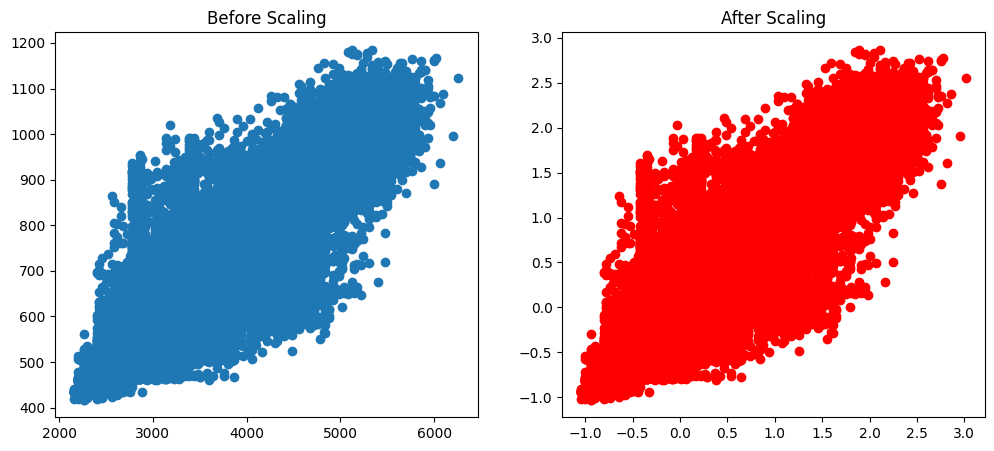

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['power_mW'], x_train['current_mA'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['power_mW'], X_train_scaled['current_mA'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [111]:
x_train_scaled  = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [113]:
x_train_scaled


,shunt_voltage,bus_voltage_V,current_mA,power_mW
0,1.741218,-1.880843,1.923221,2.362261
1,2.020281,-1.604307,1.908011,1.610394
2,-0.780501,0.607984,-0.784005,-0.546276
3,-0.922569,1.161057,-0.738378,-0.941996
4,1.604223,-0.774698,-0.474753,-0.447347
...,...,...,...,...
80703,-0.775427,0.884520,-0.692751,-0.684778
80704,2.309493,-1.880843,1.847175,2.006114
80705,1.452007,-1.880843,1.730571,1.709324
80706,2.060873,-1.604307,1.669735,1.748896


In [112]:
np.round(x_train_scaled.describe(), 2)

,shunt_voltage,bus_voltage_V,current_mA,power_mW
count,80708.00,80708.00,80708.00,80708.00
mean,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.03,-2.71,-1.03,-1.04
25%,-0.78,-0.50,-0.77,-0.78
50%,-0.56,0.61,-0.56,-0.55
75%,0.64,0.61,0.64,0.64
max,3.01,1.16,2.87,3.02


In [117]:
y_test

,Label
99716,1
30456,1
69799,1
39890,0
39134,0
...,...
57260,0
47409,1
79885,1
80234,1


# Effect of Scaling


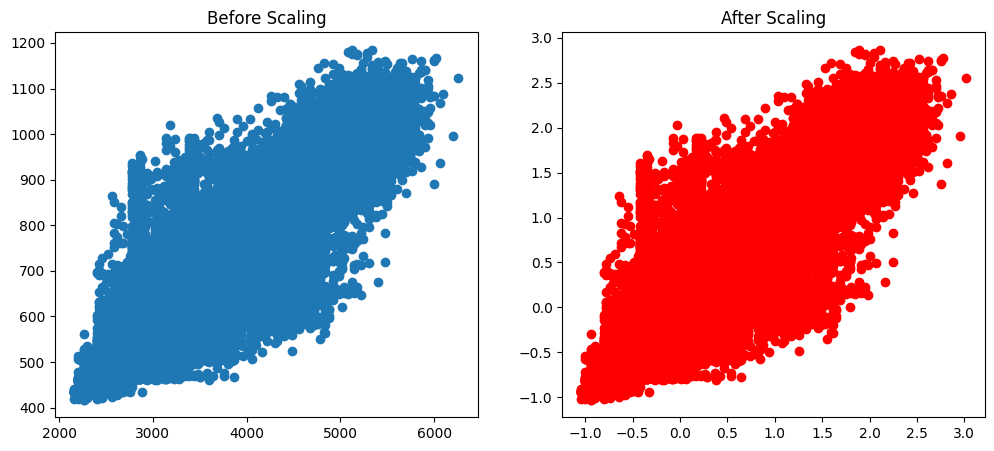

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['power_mW'], x_train['current_mA'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['power_mW'], X_train_scaled['current_mA'],color='red')
ax2.set_title("After Scaling")
plt.show()

# For Customer dataset

In [11]:
custdf = pd.read_csv('Customer.xls' , usecols = ['Age', 'AnnualIncome','NumberOfPurchases', 'TimeSpentOnWebsite','PurchaseStatus'])

In [12]:
custdf['AnnualIncome'] = custdf['AnnualIncome'].round()
custdf['TimeSpentOnWebsite'] = custdf['TimeSpentOnWebsite'].round()

In [13]:
custdf.sample(10)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,PurchaseStatus
1148,46,34429.0,12,12.0,0
1260,70,106116.0,1,53.0,1
209,42,42779.0,17,60.0,0
1097,67,136028.0,20,11.0,1
79,24,22837.0,17,19.0,0
99,44,114377.0,16,6.0,1
479,62,60458.0,20,43.0,0
1155,30,108026.0,0,60.0,1
657,19,149523.0,5,14.0,0
584,26,110355.0,9,43.0,1


In [14]:
X = custdf.drop(columns=['PurchaseStatus'])
Y = custdf['PurchaseStatus']

In [16]:
X

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite
0,40,66120.0,8,31.0
1,20,23580.0,4,38.0
2,27,127821.0,11,32.0
3,24,137799.0,19,46.0
4,31,99301.0,19,20.0
...,...,...,...,...
1495,39,65048.0,13,35.0
1496,67,28775.0,18,18.0
1497,40,57363.0,7,12.0
1498,63,134022.0,16,37.0


In [17]:
Y

,PurchaseStatus
0,1
1,0
2,1
3,1
4,1
...,...
1495,1
1496,1
1497,0
1498,1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((1200, 4), (300, 4))

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scalar to the training set, it will learn the parameters
sc.fit(X_train)

# Transform train and test sets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
np.round(X_train.describe(), 2)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite
count,1200.00,1200.00,1200.00,1200.00
mean,44.16,84946.57,10.30,30.56
std,15.44,37630.56,5.89,16.97
min,18.00,20002.00,0.00,1.00
25%,31.00,53785.00,5.00,16.00
50%,45.00,85211.50,11.00,31.00
75%,57.00,117659.50,15.00,44.00
max,70.00,149785.00,20.00,60.00


In [23]:
np.round(X_train_scaled.describe(), 2)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite
count,1200.00,1200.00,1200.00,1200.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.70,-1.73,-1.75,-1.74
25%,-0.85,-0.83,-0.90,-0.86
50%,0.05,0.01,0.12,0.03
75%,0.83,0.87,0.80,0.79
max,1.67,1.72,1.65,1.74


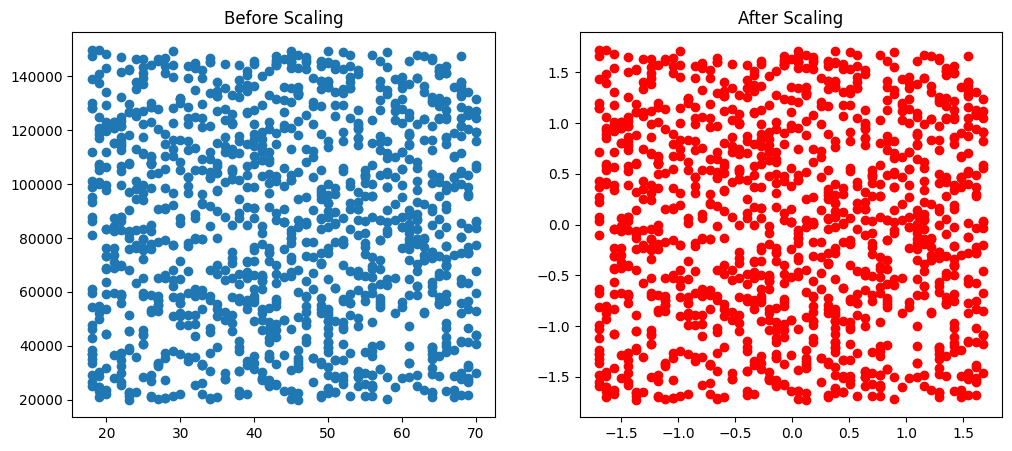

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['AnnualIncome'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['AnnualIncome'],color='red')
ax2.set_title("After Scaling")
plt.show()

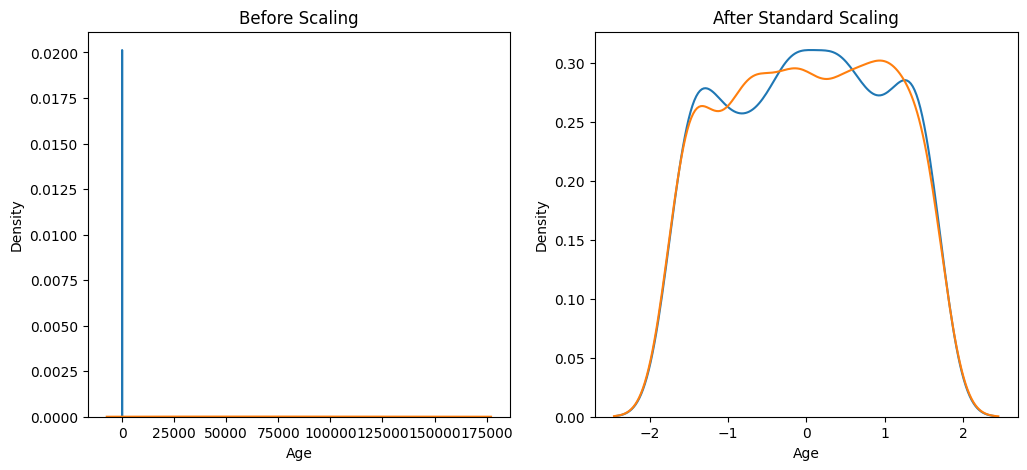

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['AnnualIncome'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['AnnualIncome'], ax=ax2)
plt.show()

# Why Scaling

In [26]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr_scaled = LogisticRegression(solver='saga', max_iter=20000)

In [40]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20000, solver='saga')

In [41]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_scaled))

0.69
0.69
